# **Car Price Prediction Using Machine Learning Algorithms**

#### Overview
1. Import libraries
2. Load dataset
3. Explore & clean the dataset 
4. Data preprocessing
5. Train & Evaluate model
6. Improve model performance
7. Save Model

-----

### **<p style="color:  #4ceae5 ">Import Libraries</p>**

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

### **<p style="color:  #4ceae5 ">Load The Dataset</p>**

In [2]:
df = pd.read_csv('Data/car_price_data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### **<p style="color:  #4ceae5 ">Explore & Clean The Dataset</p>**

##### Change spaces to underscore

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


##### Data General Description

In [4]:
# Main description of the dataset
df.describe(include='all')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,914,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,chevrolet,silverado_1500,NaN,regular_unleaded,NaN,NaN,automatic,front_wheel_drive,NaN,crossover,compact,sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [5]:
# See the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# count of NaN/NA/null value in each column 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [7]:
df[df.columns].nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [8]:
# Make lists of categorical and numerical data 
categorical = [col for col in df.columns if df[col].dtypes=='object']
numerical = [col for col in df.columns if col not in categorical]

print(categorical)
print(numerical)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']


In [9]:
# Inspect the number of unique value from each categorical feature
df[categorical].nunique()

make                  48
model                914
engine_fuel_type      10
transmission_type      5
driven_wheels          4
market_category       71
vehicle_size           3
vehicle_style         16
dtype: int64

In [10]:
def categoricalUniqueValue(col: str):
    df_cat = pd.DataFrame(df[col].value_counts()).reset_index()
    df_cat = df_cat.rename(columns={df_cat.columns[0]:col, df_cat.columns[1]:'quantity'})

    if df[col].nunique() >= 10: 
        df_cat = df_cat[:10]
        
    return df_cat

In [11]:
df_make = categoricalUniqueValue(categorical[0])
df_model = categoricalUniqueValue(categorical[1])
df_engine_fuel_type = categoricalUniqueValue(categorical[2])
df_transmission_type = categoricalUniqueValue(categorical[3])
df_driven_wheels = categoricalUniqueValue(categorical[4])
df_market_category = categoricalUniqueValue(categorical[5])
df_vehicle_size = categoricalUniqueValue(categorical[6])
df_vehicle_style = categoricalUniqueValue(categorical[7])

df_market_category

,market_category,quantity
0,crossover,1110
1,flex_fuel,872
2,luxury,855
3,"luxury,performance",673
4,hatchback,641
5,performance,601
6,"crossover,luxury",410
7,"luxury,high-performance",334
8,"exotic,high-performance",261
9,"hatchback,performance",252


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
                    rows=2, cols=4,
                    column_widths=[0.25, 0.25, 0.25, 0.25],
                    row_heights=[0.5, 0.5],
                    specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
                           [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}]
                    #     [            None                    , {"type": "surface"}]
                ], 
                    horizontal_spacing=0.1, vertical_spacing=0.15,
                    subplot_titles=(re.sub('_', ' ', df_make.columns[0]).title(),
                                    re.sub('_', ' ', df_model.columns[0]).title(), 
                                    re.sub('_', ' ', df_engine_fuel_type.columns[0]).title(),
                                    re.sub('_', ' ', df_transmission_type.columns[0]).title(),
                                    re.sub('_', ' ', df_driven_wheels.columns[0]).title(),
                                    re.sub('_', ' ', df_market_category.columns[0]).title(), 
                                    re.sub('_', ' ', df_vehicle_size.columns[0]).title(),
                                    re.sub('_', ' ', df_vehicle_style.columns[0]).title(),),
)

fig.add_trace(
    go.Bar(
            # df_transmission_type, 
            x=df_make[df_make.columns[1]], 
            y=df_make[df_make.columns[0]], 
            orientation='h',
),                      
            row=1, 
            col=1
)

fig.add_trace(
    go.Bar(
            # df_driven_wheels, 
            x=df_model[df_model.columns[1]], 
            y=df_model[df_model.columns[0]], 
            orientation='h'
),                      
            row=1, 
            col=2
)

fig.add_trace(
    go.Bar(
            # df_transmission_type, 
            x=df_engine_fuel_type[df_engine_fuel_type.columns[1]], 
            y=df_engine_fuel_type[df_engine_fuel_type.columns[0]], 
            orientation='h'
),                      
            row=1, 
            col=3
)

fig.add_trace(
    go.Bar(
            # df_driven_wheels, 
            x=df_transmission_type[df_transmission_type.columns[1]], 
            y=df_transmission_type[df_transmission_type.columns[0]], 
            orientation='h'
),                      
            row=1, 
            col=4
)

fig.add_trace(
    go.Bar(
            # df_transmission_type, 
            x=df_driven_wheels[df_driven_wheels.columns[1]], 
            y=df_driven_wheels[df_driven_wheels.columns[0]], 
            orientation='h',
),                      
            row=2, 
            col=1
)

fig.add_trace(
    go.Bar(
            # df_driven_wheels, 
            x=df_market_category[df_market_category.columns[1]], 
            y=df_market_category[df_market_category.columns[0]], 
            orientation='h'
),                      
            row=2, 
            col=2
)

fig.add_trace(
    go.Bar(
            # df_transmission_type, 
            x=df_vehicle_size[df_vehicle_size.columns[1]], 
            y=df_vehicle_size[df_vehicle_size.columns[0]], 
            orientation='h'
),                      
            row=2, 
            col=3
)

fig.add_trace(
    go.Bar(
            # df_driven_wheels, 
            x=df_vehicle_style[df_vehicle_style.columns[1]], 
            y=df_vehicle_style[df_vehicle_style.columns[0]], 
            orientation='h'
),                      
            row=2, 
            col=4
)

fig.update_xaxes(title_text='quantity', row=1, col=1)
fig.update_xaxes(title_text='quantity', row=1, col=2)
fig.update_xaxes(title_text='quantity', row=1, col=3)
fig.update_xaxes(title_text='quantity', row=1, col=4)
fig.update_xaxes(title_text='quantity', row=2, col=1)
fig.update_xaxes(title_text='quantity', row=2, col=2)
fig.update_xaxes(title_text='quantity', row=2, col=3)
fig.update_xaxes(title_text='quantity', row=2, col=4)

# fig.update_yaxes(title_text=df_transmission_type.columns[0], row=1, col=1)
# fig.update_yaxes(title_text=df_driven_wheels.columns[0], row=1, col=2)
fig.update_yaxes(ticklen=1, row=1, col=3)
# fig.update_yaxes(title_text=df_market_category.columns[0], row=1, col=4)

fig.update_layout(height=1000, width=3000, showlegend = False,)

fig.show()

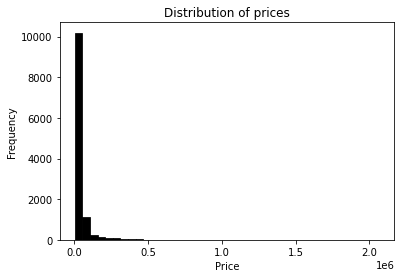

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

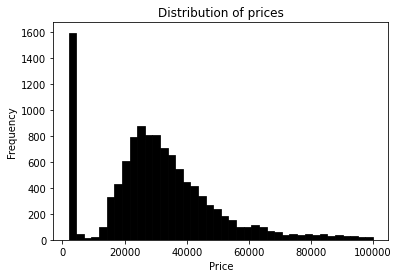

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

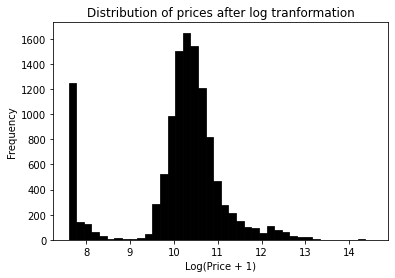

In [15]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [16]:
df_final = df[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']].fillna(0)
df_final

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,msrp
0,335.0,6.0,26,19,3916,46135
1,300.0,6.0,28,19,3916,40650
2,300.0,6.0,28,20,3916,36350
3,230.0,6.0,28,18,3916,29450
4,230.0,6.0,28,18,3916,34500
...,...,...,...,...,...,...
11909,300.0,6.0,23,16,204,46120
11910,300.0,6.0,23,16,204,56670
11911,300.0,6.0,23,16,204,50620
11912,300.0,6.0,23,16,204,50920


In [17]:
int_col = list(df_final.columns[df_final.dtypes == 'int64'])
df_final[int_col] = df_final[int_col].astype('float64')
df_final

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,msrp
0,335.0,6.0,26.0,19.0,3916.0,46135.0
1,300.0,6.0,28.0,19.0,3916.0,40650.0
2,300.0,6.0,28.0,20.0,3916.0,36350.0
3,230.0,6.0,28.0,18.0,3916.0,29450.0
4,230.0,6.0,28.0,18.0,3916.0,34500.0
...,...,...,...,...,...,...
11909,300.0,6.0,23.0,16.0,204.0,46120.0
11910,300.0,6.0,23.0,16.0,204.0,56670.0
11911,300.0,6.0,23.0,16.0,204.0,50620.0
11912,300.0,6.0,23.0,16.0,204.0,50920.0


### **<p style="color:#4ceae5">Data Preprocessing</p>**

##### Transform Data

In [18]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()

# df_preprocessed = scaler.fit_transform(df_final)
# df_preprocessed = pd.DataFrame(df_preprocessed, columns=df_final.columns)

# df_preprocessed


##### Split Train and Test Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,:5], df_final['msrp'], random_state=123)

In [20]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8935
8935
2979
2979


### **<p style="color:#4ceae5">Train & Evaluate The Model</p>**

##### Xgboost (Extreme Gradient Boosting)

In [21]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Evaluating the model
xgb_score = xgb_reg.score(X_test, y_test)
print(f'Score: {xgb_score:.2f}')

y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

# df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
# df_test

Score: 0.95
RMSE: 13227.32


##### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_score = lin_reg.score(X_test, y_test)
print(f'Score: {lin_reg_score:.2f}')

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

# df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
# df_test

Score: 0.49
RMSE: 40840.48


##### Ridge Linear Model

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.8)

ridge_reg.fit(X_train, y_train)

ridge_reg_score = ridge_reg.score(X_test, y_test)
print(f'Score: {ridge_reg_score:.3f}')

y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.3f" % (rmse))

# df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
# df_test

Score: 0.493
RMSE: 40840.371


In [24]:
from sklearn.model_selection import cross_val_score

xgb_reg_scores = cross_val_score(xgb_reg, X_train, y_train, cv=10)
print(xgb_reg_scores)
print(f'mean: {xgb_reg_scores.mean()}')

[0.87699721 0.98021357 0.8777384  0.83907867 0.82458515 0.89187636
 0.78252647 0.9639862  0.94409864 0.73241707]
mean: 0.8713517753267184


### **<p style="color:#4ceae5">Improve Model's Performance</p>**

##### Hyperparameter Tuning using GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'alpha':[0.1, 0.3, 0.5, 1.0],
                'solver':('svd', 'cholesky'), 
}
reg = GridSearchCV(ridge_reg, parameters)

gs = reg.fit(X_train, y_train)
clf = gs.best_estimator_

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.493


##### Hyperparameter Tuning using Optuna

In [28]:
from optuna.integration import XGBoostPruningCallback
from sklearn.model_selection import RepeatedKFold
from optuna import create_study
from optuna.samplers import TPESampler

RS = 124  # random state

# repeated K-folds
N_SPLITS = 10
N_REPEATS = 1

# Optuna
N_TRIALS = 20
MULTIVARIATE = True

# XGBoost
EARLY_STOPPING_ROUNDS = 10

def objective(
    trial,
    X,
    y,
    random_state=22,
    n_splits=3,
    n_repeats=2,
    n_jobs=1,
    early_stopping_rounds=50,
):
    # XGBoost parameters
    params = {
        "verbosity": 0,  # 0 (silent) - 3 (debug)
        "objective": "reg:squarederror",
        "n_estimators": 10000,
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_loguniform("subsample", 0.4, 0.8),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 10.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "gamma": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 10, 1000),
        "seed": random_state,
        "n_jobs": n_jobs,
    }

    model = XGBRegressor(**params)
    pruning_callback = XGBoostPruningCallback(trial, "validation_0-rmse")
    rkf = RepeatedKFold(
        n_splits=n_splits, n_repeats=n_repeats, random_state=random_state
    )
    X_values = X.values
    y_values = y.values
    y_pred = np.zeros_like(y_values)
    for train_index, test_index in rkf.split(X_values):
        X_A, X_B = X_values[train_index, :], X_values[test_index, :]
        y_A, y_B = y_values[train_index], y_values[test_index]
        model.fit(
            X_A,
            y_A,
            eval_set=[(X_B, y_B)],
            eval_metric="rmse",
            verbose=0,
            callbacks=[pruning_callback],
            early_stopping_rounds=early_stopping_rounds,
        )
        y_pred[test_index] += model.predict(X_B)
    y_pred /= n_repeats
    return np.sqrt(mean_squared_error(y_train, y_pred))


In [29]:
sampler = TPESampler(seed=RS, multivariate=MULTIVARIATE)
study = create_study(direction="minimize",)
study.optimize(
    lambda trial: objective(
        trial,
        X_train,
        y_train,
        random_state=RS,
        n_splits=N_SPLITS,
        n_repeats=N_REPEATS,
        n_jobs=8,
        early_stopping_rounds=EARLY_STOPPING_ROUNDS,
    ),
    n_trials=N_TRIALS,
    n_jobs=1,
)

# display params
hp = study.best_params
for key, value in hp.items():
    print(f"{key:>20s} : {value}")
print(f"{'best objective value':>20s} : {study.best_value}")

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\samplers\_tpe\sampler.py:263: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2022-05-24 17:39:55,876] A new study created in memory with name: no-name-7ee8c61f-3e90-4845-a92b-c9ae10ef80f0
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`callbacks` in `fit` met

           max_depth : 6
       learning_rate : 0.040874514007462975
    colsample_bytree : 0.5190025916340755
           subsample : 0.6406847139364312
               alpha : 8.125235765380786
              lambda : 0.00025912788386080914
    min_child_weight : 12.702695321319675
best objective value : 27874.497785528198


##### Feature Selection

In [18]:
xgb_reg.feature_importances_

array([0.08101854, 0.84965104, 0.01328569, 0.02803506, 0.02800962],
      dtype=float32)

### **<p style="color:#4ceae5">Save The Model</p>**